# Project Name: Movies EDA
# Author: Makz Eze
# Data Set Available @: Kaggle

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# bring in data
#data_import = pd.read_csv("movies.csv")
dfs= pd.read_csv(r'C:\Users\ginks\Documents\Python\Practice\moviess.csv\movies.csv')
#= pd.read_csv("movies.csv",parse_dates=["date_added"])

In [110]:
dfs.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [111]:
for col in dfs.columns:
    pct_missing = np.mean(dfs[col].isnull())
    print('{}-{}%'.format(col,round(pct_missing*100)))

name-0%
rating-1%
genre-0%
year-0%
released-0%
score-0%
votes-0%
director-0%
writer-0%
star-0%
country-0%
budget-28%
gross-2%
company-0%
runtime-0%


In [114]:
dfs.dtypes
#dfs['budget'] = dfs['budget'].astype('int64')
#dfs['gross'] = dfs['gross'].astype('int64')

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [ ]:
dfs['release_year']=dfs['released'].astype(str).str[:-15]
dfs['release_year']

In [ ]:
pd.set_option('display.max_rows',None)
dfs.sort_values(by=['gross'],inplace=False,ascending=False)

In [ ]:
dfs['company'].drop_duplicates().sort_values(ascending=False)

<function matplotlib.pyplot.show(close=None, block=None)>

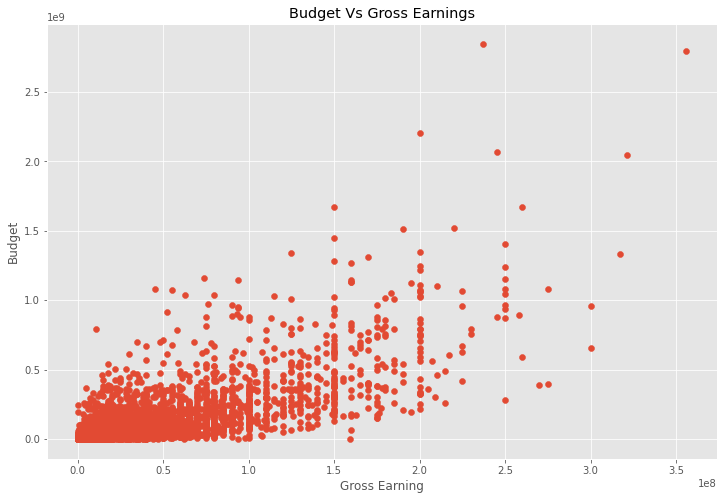

In [94]:
plt.scatter(x=dfs['budget'],y=dfs['gross'])
plt.title('Budget Vs Gross Earnings')
plt.xlabel('Gross Earning')
plt.ylabel('Budget')
plt.show

In [ ]:
dfs.head()

<AxesSubplot:xlabel='budget', ylabel='gross'>

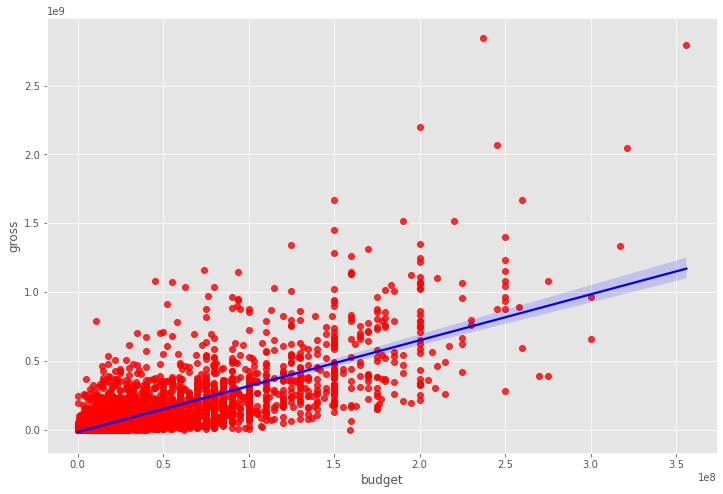

In [100]:
sns.regplot(x='budget',y='gross',data=dfs,scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [103]:
dfs.corr(method='kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.067652,0.331465,0.224120,0.200618,0.097184
score,0.067652,1.000000,0.300115,-0.000566,0.086046,0.283611
votes,0.331465,0.300115,1.000000,0.353702,0.548899,0.198240
budget,0.224120,-0.000566,0.353702,1.000000,0.512637,0.235483
gross,0.200618,0.086046,0.548899,0.512637,1.000000,0.168933
runtime,0.097184,0.283611,0.198240,0.235483,0.168933,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

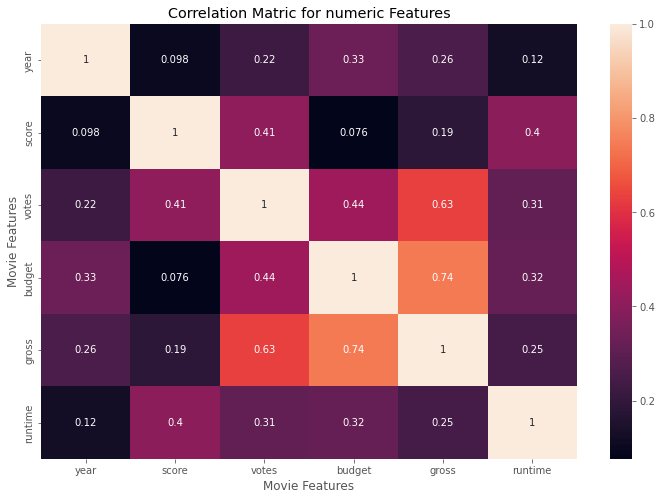

In [105]:
corr_matrix = dfs.corr(method='pearson')
sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation Matric for numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show

In [ ]:
dfs_numeric = dfs
dfs_numerics = dfs_numeric
 
for i in dfs_numerics:
    if (dfs_numerics[i].dtype == 'object'):
        dfs_numerics[i]=dfs_numerics[i].astype('category')
        dfs_numerics[i]=dfs_numerics[i].cat.codes


dfs_numerics


In [120]:
dfs.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


<function matplotlib.pyplot.show(close=None, block=None)>

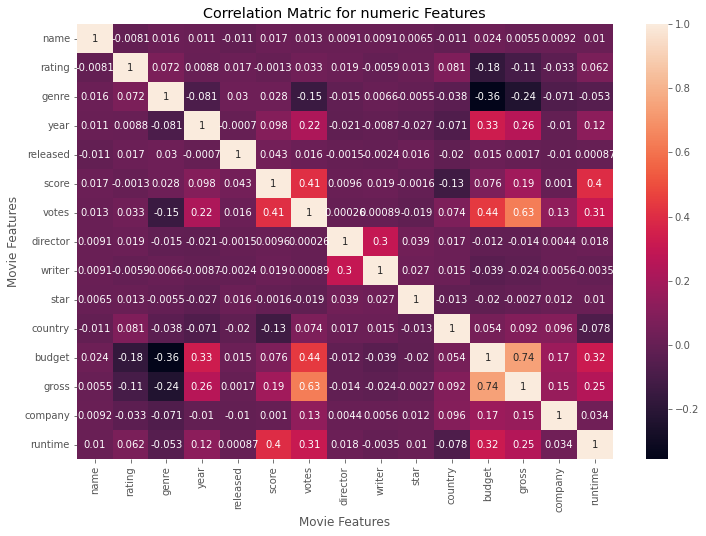

In [121]:
corr_matrix = dfs_numerics.corr(method='pearson')
sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation Matric for numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show

In [ ]:
corr_mat=dfs_numerics.corr()
corr_pairs=corr_mat.unstack()

corr_pairs

In [ ]:
sorted_pairs=corr_pairs.sort_values()
sorted_pairs

In [128]:
High_corr = sorted_pairs[(sorted_pairs) >0.5]
High_corr

gross     votes       0.630757
votes     gross       0.630757
budget    gross       0.740395
gross     budget      0.740395
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64